# Dependencies


In [8]:
import sys
sys.path.append("../")

import pandas as pd
import numpy as np
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.preprocessing import LabelEncoder
from src.utils import (
    build_freqs,
    train_naive_bayes,
    predict_naive_bayes,
    cross_validation,
)
encoder = LabelEncoder()

# Preprocessing


In [ ]:
df = pd.read_csv("../data/preprocessed/masakhane_afrisenti_twi_train_preprocessed.csv")
df.head()

,tweet,label,sentiment
0,kako be shark but wo ti ewu,negative,0
1,br ne bayie nti na me supporti man city,negative,0
2,s3 woofis3 mada wafutuo tantan no 3y3wo s3mafa...,negative,0
3,wabɔdam anaa wo trumu yɛ nkate nkwan aseɛ,negative,0
4,enfa bi da bra 🤣🤣,negative,0


# Model Training


In [10]:
train_x = df["tweet"]
train_y = df["sentiment"]

In [11]:
freqs = build_freqs(train_x, train_y)

In [12]:
logprior, loglikelihood, vocab, classes = train_naive_bayes(freqs, train_x, train_y)

# Model Prediction


In [13]:
text = "3kom"

pred = predict_naive_bayes(text, logprior, loglikelihood, vocab, classes)
print(pred)

negative


# Model Validation


In [ ]:
df2 = pd.read_csv("../data/raw/masakhane_afrisenti_twi_validation.csv")
df2["sentiment"] = encoder.fit_transform(df2["label"])
val_x = df2["tweet"]
val_y = df2["sentiment"]

In [15]:
alphas = [0.1, 0.01, 0.2, 0.02, 0.3, 0.03, 0.4, 0.04, 0.5, 0.05]
best_alpha, sc = cross_validation(train_x, train_y, val_x, val_y, alphas)

# Retraining Using CV + Train set


In [16]:
full_train_x = np.concatenate([train_x, val_x])
full_train_y = np.concatenate([train_y, val_y])

In [17]:
freqs_full = build_freqs(full_train_x, full_train_y)

In [18]:
logprior_f, loglikelihood_f, vocab_f, classes_f = train_naive_bayes(
    freqs_full, full_train_x, full_train_y, alpha=0.05
)

# Test and Evaluation


In [ ]:
df3 = pd.read_csv("../data/raw/masakhane_afrisenti_twi_test.csv")
df3["sentiment"] = encoder.fit_transform(df3["label"])
test_x = df3["tweet"]
test_y = df3["sentiment"]

In [20]:
test_preds = [
    predict_naive_bayes(text, logprior_f, loglikelihood_f, vocab_f, classes_f)
    for text in test_x
]
test_preds_enc = encoder.transform(test_preds)
f1_f = f1_score(test_y, test_preds_enc, average="macro")
f1_f

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Accuracy: 0.6269757639620653


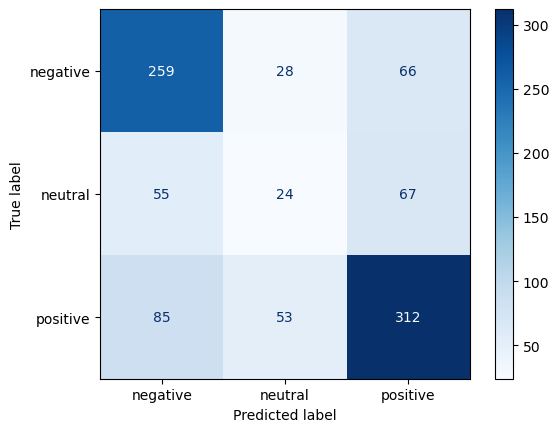

In [ ]:
acc = accuracy_score(test_y, test_preds_enc)
print("Accuracy:", acc)

cm = confusion_matrix(test_y, test_preds_enc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap="Blues")
